# Load a trained MACE model

In this notebook, the flow of loading a trained MACE model, step by step.

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
import matplotlib           as mpl
import torch
from time                   import time

from matplotlib          import rcParams, rc
rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'font.size': 10})
rc('font', family='serif')
rc('text', usetex=True)

import src.mace.CSE_0D.dataset  as ds
import src.mace.train           as train
import src.mace.test            as test
import src.mace.load            as load
import src.mace.mace            as mace
from src.mace.loss              import Loss
import src.mace.utils           as utils




def temp(Tstar, eps, r):
    Rstar = 2e13
    # r = 1e16
    T = Tstar * (r/Rstar)**(-eps)
    return T

dt_fracts = {4 : 0.296, 5: 0.269,8: 0.221,10: 0.175,12: 0.146,16: 0.117,20: 0.09,25: 0.078,32: 0.062,48: 0.043,64: 0.033,128: 0.017}

%reload_ext autoreload
%autoreload 2

## Loading the model
Setting the directory of the model.


In [31]:
outloc  = '/STER/silkem/MACE/models/CSE_0D/'
# dirname = '20240516_143556'     ## analogue to int2 model
dirname = '20240604_160152'     ## analogue to int4 model

Loading the trained model.

In [32]:
trained = load.Trained_MACE(outloc=outloc, dirname=dirname, epoch=7)
meta = trained.get_meta()
model = trained.model

The model has 284692 trainable parameters


Plotting the evolution of the loss function.

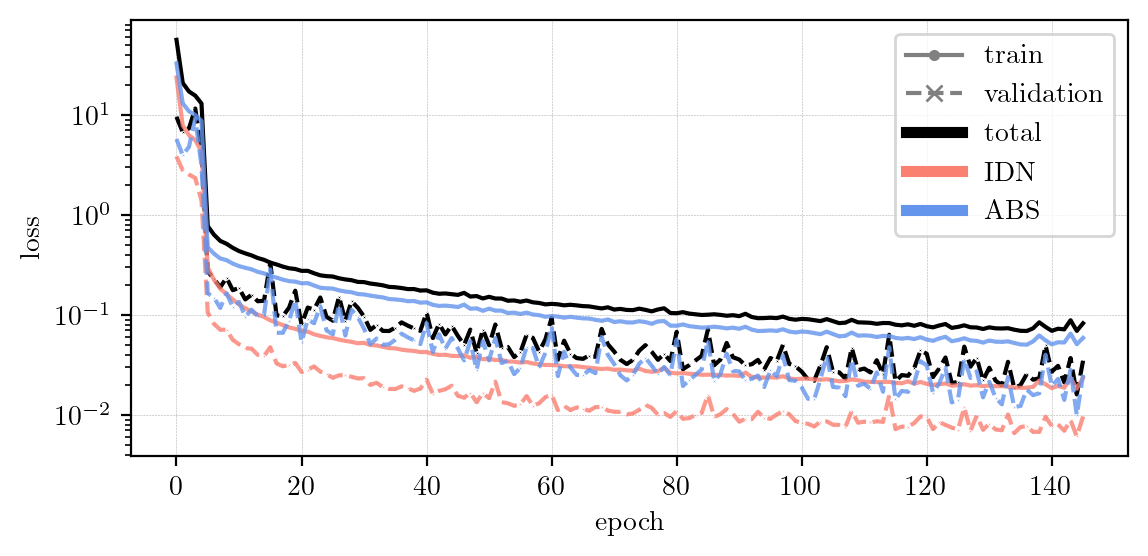

In [33]:
lossfig = trained.plot_loss(save=True)

## Testing the model

In the directory 'data/test/' there are three test models given on which the loaded model can be tested. There is a low-density model, mid-density, and high-density model available.

-------------------
Input of test model
-------------------
Mdot [Msol/yr]:       1e-06
v [km/s]:             17.5
Density proxi Mdot/v: 5.714285714285714e-13

Temp at 1e16 cm [K]:  93.91
Tstar:                2100.0
eps:                  0.5
-------------------

>>> Testing step...
Solving time [s]: 0.004214048385620117

>>> Testing evolution...
Solving time [s]: 0.3092014789581299
Total   time [s]: 0.3106346130371094

>>> Denormalising... 

Errors (following Eq. 23 of Maes et al., 2024):
      Step error: 4.673
 Evolution error: 15.862

>>> Plotting...
No species specified, using a default list:
     CO, H2O, OH, C2H2, C2H, CH3C5NH+, C10H2+

Step test plot saved as /STER/silkem/MACE/models/CSE_0D/20240604_160152/step_mid_dens.png
Evolution test plot saved as /STER/silkem/MACE/models/CSE_0D/20240604_160152/evol_mid_dens.png


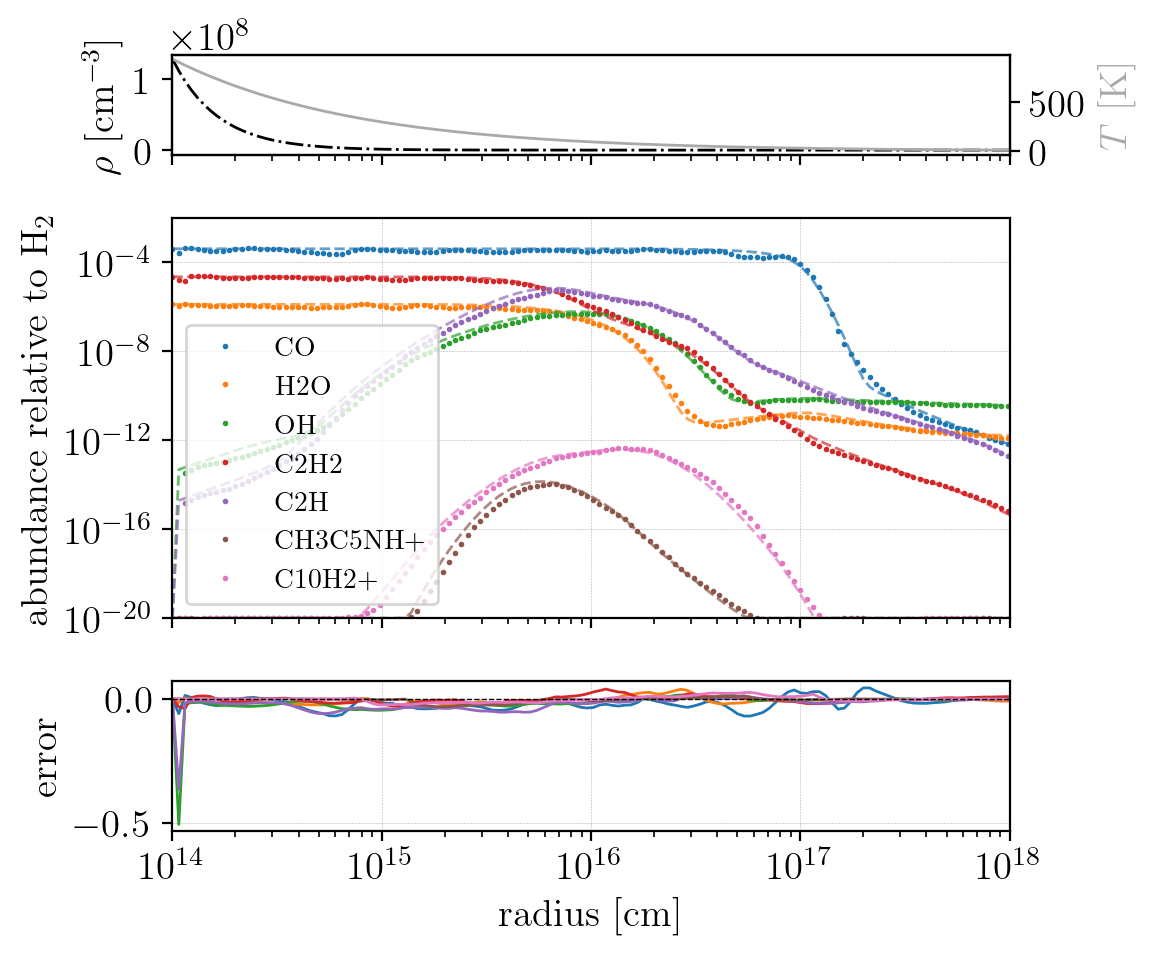

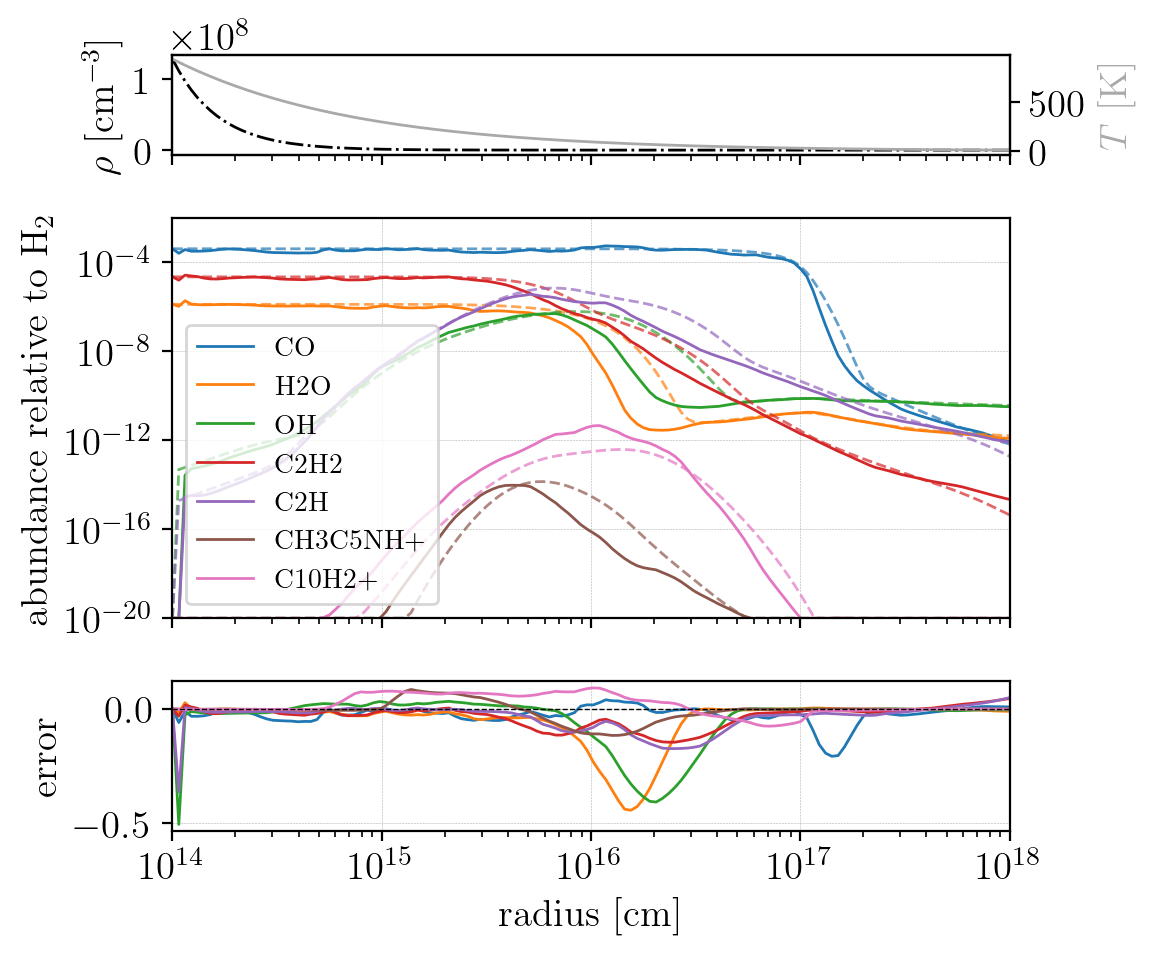

In [40]:
testpath = 'mid_dens'

macetime = test.test_model(model,testpath, meta, plotting=True, save = True, inpackage = True)